In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop

In [21]:
# Load dataset — keep top 10,000 most frequent words
vocab_size = 10000
max_length = 200

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences to ensure equal input length
X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)

In [3]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=32, input_length=max_length))
model.add(SimpleRNN(32, activation='tanh'))  # Can change to LSTM(32) if desired
model.add(Dense(1, activation='sigmoid'))  # Binary classification

/Users/Student/Library/Mobile Documents/com~apple~CloudDocs/SETU/Sem 2/Data Analytics and Algorithms/Assignment/Implementation/Data-Science-Implementation/.venv/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [4]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
model.fit(X_train, y_train, epochs=3, batch_size=64, validation_split=0.2)

Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.5557 - loss: 0.6763 - val_accuracy: 0.7828 - val_loss: 0.4776
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8199 - loss: 0.4204 - val_accuracy: 0.8126 - val_loss: 0.4444
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8986 - loss: 0.2599 - val_accuracy: 0.8282 - val_loss: 0.4375


In [6]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.2f}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8226 - loss: 0.4389
Test Accuracy: 0.83


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 966,341 (3.69 MB)

 Trainable params: 322,113 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 644,228 (2.46 MB)

I was ccurious which activation works the best. So I decided to compare them.

In [9]:
# Function to create and train a model with a given activation
def build_and_train_model(activation):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=32, input_length=max_length))
    model.add(SimpleRNN(32, activation=activation))
    model.add(Dense(1, activation='sigmoid'))  # binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=3, batch_size=64, validation_split=0.2, verbose=0)
    val_acc = history.history['val_accuracy'][-1]
    print(f"{activation} → Validation Accuracy: {val_acc:.4f}")
    return history

# List of activations to test
activations = ['tanh', 'relu', 'sigmoid', 'selu']
results = {}

for act in activations:
    results[act] = build_and_train_model(act)

tanh → Validation Accuracy: 0.8258
relu → Validation Accuracy: 0.7882
sigmoid → Validation Accuracy: 0.7544
selu → Validation Accuracy: 0.5206


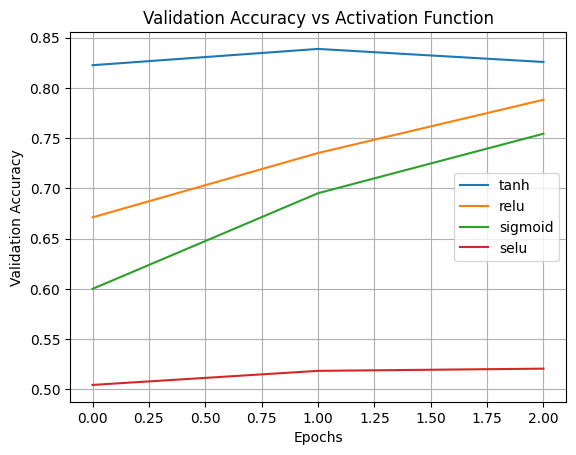

In [10]:
for act in activations:
    plt.plot(results[act].history['val_accuracy'], label=f'{act}')

plt.title("Validation Accuracy vs Activation Function")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()

Comparing Types of Gradient Descent

In [12]:
optimizers = {
    'SGD': tf.keras.optimizers.SGD(),
    'Momentum': tf.keras.optimizers.SGD(momentum=0.9),
    'Adam': tf.keras.optimizers.Adam(),
    'RMSprop': tf.keras.optimizers.RMSprop()
}

for name, opt in optimizers.items():
    model = Sequential([
        Embedding(input_dim=10000, output_dim=32, input_length=200),
        SimpleRNN(32),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=3, batch_size=64, verbose=0)
    val_acc = history.history['val_accuracy'][-1]
    print(f"{name} → Validation Accuracy: {val_acc:.4f}")

SGD → Validation Accuracy: 0.5282
Momentum → Validation Accuracy: 0.6314
Adam → Validation Accuracy: 0.7630
RMSprop → Validation Accuracy: 0.8242


Variants of RNN

In [23]:
def test_rnn_variant(layer_name):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=32, input_length=max_length))

    if layer_name == 'SimpleRNN':
        model.add(SimpleRNN(32))
    elif layer_name == 'LSTM':
        model.add(LSTM(32))
    elif layer_name == 'GRU':
        model.add(GRU(32))

    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=3, batch_size=64, validation_split=0.2, verbose=0)
    
    val_acc = history.history['val_accuracy'][-1]
    print(f"{layer_name} → Validation Accuracy: {val_acc:.4f}")
    return history

In [24]:
variants = ['SimpleRNN', 'LSTM', 'GRU']
histories = {}

for v in variants:
    histories[v] = test_rnn_variant(v)

/Users/Student/Library/Mobile Documents/com~apple~CloudDocs/SETU/Sem 2/Data Analytics and Algorithms/Assignment/Implementation/Data-Science-Implementation/.venv/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


SimpleRNN → Validation Accuracy: 0.8492
LSTM → Validation Accuracy: 0.8468
GRU → Validation Accuracy: 0.8590
